In [2]:
import pandas as pd
import numpy as np
from os import path
import IPython.display as ipd
import librosa
import matplotlib as plt
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy
import soundfile as sf
from scipy.io.wavfile import write
import sklearn
from sklearn.model_selection import train_test_split
from scipy import fft
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
import pickle


In [2]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=54d1efd9556640d893154740b63a450ec03881c549bfac6ef807349c0ac181a5
  Stored in directory: c:\users\nesterov-dv\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=89dd3c932449ca1ca5858581e67a8c053d3ed7d86e8cefc4b5918a631b109c4d
  Stored in directory: c:\users\nesterov-dv\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy


In [4]:
import os
import glob
import tempfile, os, zipfile




path = "C:/Users/nesterov-dv/Downloads/audio_train/train"
files = os.listdir(path)
zero = []
for filename in glob.glob(os.path.join(path, '*.wav')):
    samplerate, data = scipy.io.wavfile.read(filename)
    zero.append(data)

In [5]:
len(zero)
#загружено  записи

5683

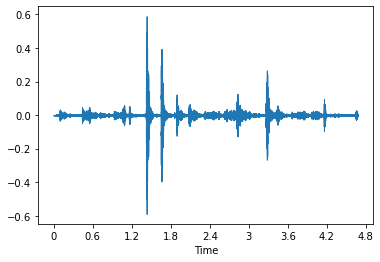

<Figure size 1080x324 with 0 Axes>

Samplerate: 22050, Length of wav: 103194


In [21]:
#посмотрим на данные на примере одной записи

path_file = r"C:\Users\nesterov-dv\Downloads\audio_train\train\0a0a60cf2e02c62197e7.wav"
wav, sr = librosa.load(path_file)
librosa.display.waveshow(wav, sr=sr)
plt.figure(figsize=(15, 4.5))
plt.show()
ipd.Audio(wav, rate=sr)

print('Samplerate: {}, Length of wav: {}'.format(sr, len(wav)))

In [53]:
train_labels=pd.read_csv(r"C:\Users\nesterov-dv\Downloads\train.csv")

In [54]:
path = "C:/Users/nesterov-dv/Downloads/audio_train/train"
a=[path]*5683

In [55]:
train_labels["link"]=a

In [56]:
train_labels["link1"] = train_labels["link"].astype(str) + "/" + train_labels["fname"].astype(str).str.zfill(6)
train_labels["link1"][0]

'C:/Users/nesterov-dv/Downloads/audio_train/train/8bcbcc394ba64fe85ed4.wav'

# Извлечение признаков

1. mfcc
2. mel-значения в дБ
3. zero crossing rate (zcr)
4. хроматограмма по сигналам
5. спектральные центроиды

In [62]:
chroma_stft_val=[]
mel=[]
mel_db=[]
mfcc_val=[]
spec_centroid =[]
for i in range(len(train_labels)):
    x,sr=librosa.load(train_labels["link1"].iloc[i], mono=True)   
    chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
    chroma_stft_val.append(np.mean(chroma_stft))

    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    mfcc.mean(axis=1)
    mfcc_val.append(mfcc.mean(axis=1))
    
    
    spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
    spec_centroid.append(np.mean(spec_cent))

    


C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


In [63]:
train_labels["chroma_stft.mean"]=chroma_stft_val
train_labels["spec_cent.mean"]=spec_centroid

In [64]:
arr=np.asarray(mfcc_val)
MFCC_DF = pd.DataFrame(arr, columns = ['MFCC1','MFCC2','MFCC3','MFCC4','MFCC5','MFCC6','MFCC7','MFCC8','MFCC9','MFCC10','MFCC11','MFCC12','MFCC13','MFCC14','MFCC15','MFCC16','MFCC17','MFCC18','MFCC19','MFCC20',])

In [65]:
train_labels=pd.concat([train_labels, MFCC_DF], axis=1)

In [83]:
mel_db=[]
mel=[]
zcr_val=[]
for i in range(len(train_labels)):
        x,sr=librosa.load(train_labels["link1"].iloc[i], mono=True)   

        mels=librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                    fmax=8000)
        mels_db = librosa.amplitude_to_db(mels)
        mel.append(mels.mean(axis=1))
        mel_db.append(mels_db.mean(axis=1))


        zcr = librosa.feature.zero_crossing_rate(x)
        zcr_val.append(np.mean(zcr))

In [84]:
train_labels["mean_zcr"]=zcr_val

In [87]:
mel_db=np.asarray(mel_db)

mel_db_df=pd.DataFrame(mel_db)

In [91]:
train_labels=pd.concat([train_labels, mel_db_df], axis=1)

# Разделение на обучающую и тестовую выборки

In [6]:
train_labels=pd.read_csv(r"C:\Users\nesterov-dv\Downloads\extracted.csv")

In [7]:
X=train_labels.loc[:,"chroma_stft.mean":]
X

,chroma_stft.mean,spec_cent.mean,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,...,119,120,121,122,123,124,125,126,127,label_num
0,0.599837,3236.617813,-544.60270,41.559383,-54.300285,50.719670,-22.157557,22.945400,-19.005857,18.260895,...,-62.965996,-64.644806,-65.072890,-62.285380,-60.558900,-59.522102,-60.111885,-63.460530,-67.033900,16
1,0.641052,2384.953258,-445.07477,77.769160,-20.973577,44.579628,-22.406464,27.424837,-9.946759,12.112359,...,-44.651577,-44.538197,-44.534203,-44.705677,-44.620200,-44.545370,-44.809338,-44.834286,-44.834286,34
2,0.412584,597.493549,-317.91843,186.538070,27.002405,-20.485870,7.619408,20.530241,4.875048,-4.836398,...,-12.288696,-12.288696,-12.288696,-12.288696,-12.288696,-12.288696,-12.288696,-12.288696,-12.288696,14
3,0.222431,2038.193140,-380.04865,84.650390,-55.757427,33.086727,-33.839180,10.950944,-26.757208,-2.559376,...,-40.206140,-40.242462,-40.232212,-40.204845,-40.200060,-40.242462,-40.242462,-40.242462,-40.242462,22
4,0.360137,2374.571479,-400.79430,84.682810,-95.998000,3.099290,-29.627249,25.633928,-33.591910,0.158687,...,-50.904648,-50.885254,-51.075428,-51.520664,-51.437546,-51.584442,-51.657120,-51.657120,-51.657120,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,0.247419,724.338533,-448.49274,60.625618,51.651127,41.994620,33.294960,25.561966,19.184006,14.459284,...,-7.598045,-7.598045,-7.598045,-7.598045,-7.598045,-7.598045,-7.598045,-7.598045,-7.598045,6
5679,0.522650,3762.756240,-324.43490,51.706540,-55.067745,66.330215,-38.977074,45.802532,-28.064903,26.365322,...,-28.645632,-34.060257,-34.921524,-37.048560,-34.324840,-33.505566,-37.769203,-44.281246,-46.124336,32
5680,0.300395,981.572153,-436.01993,134.217420,-7.553867,42.228240,4.197356,8.710498,3.348115,24.033790,...,-42.716103,-42.716103,-42.716103,-42.716103,-42.716103,-42.716103,-42.716103,-42.716103,-42.716103,6
5681,0.446443,3260.841544,-387.63757,51.981007,-23.477228,34.043400,-32.502323,22.189080,-22.679450,7.896717,...,-31.810210,-31.332430,-31.476343,-31.296663,-32.176613,-32.179405,-33.233162,-36.357240,-36.357240,33


In [8]:
# Нормализуем
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
X=minmax.fit_transform(X)

In [10]:
train_labels["label"] = pd.Categorical(train_labels["label"])
train_labels['label_num'] = train_labels["label"].cat.codes
y=train_labels['label_num']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Обучение и тестирование моделей

SVM

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [38]:
svm_class=svm.SVC()
svm_class.fit(X_train, y_train)
y_pred=svm_class.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0 ...  0  0  0]
 [ 0 22  3 ...  0  0  0]
 [ 1  2 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 32 12  2]
 [ 0  0  0 ...  3 20  1]
 [ 0  0  0 ...  3  0 18]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.85      0.85      0.85        26
           2       0.65      0.54      0.59        24
           3       0.84      0.98      0.90        43
           4       0.84      0.62      0.71        26
           5       0.86      0.60      0.71        10
           6       0.69      0.58      0.63        38
           7       0.80      0.25      0.38        16
           8       0.59      0.92      0.72        24
           9       0.50      0.47      0.48        17
          10       0.61      0.71      0.65        24
          11       0.54      0.68      0.60        22
          12       0.70      0.94      0.80        35
          13       0.00      0.00      0.00        16
          14       0.47      0.50

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   2.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.372 total time=   2.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.331 total time=   2.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.348 total time=   2.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.331 total time=   2.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   2.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.224 total time=   2.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   2.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.188 total time=   2.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.058 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [ ]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [31]:
svm_class=svm.SVC(C=1000, gamma=0.01)
svm_class.fit(X_train, y_train)
y_pred=svm_class.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


f1_svm=f1_score(y_test, y_pred, average='macro')

[[44  0  1 ...  0  0  0]
 [ 1 24  1 ...  0  0  0]
 [ 1  1 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  3  1]
 [ 0  0  0 ...  3 19  1]
 [ 0  0  0 ...  2  0 26]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.89      0.92      0.91        26
           2       0.69      0.83      0.75        24
           3       0.93      0.93      0.93        43
           4       0.90      0.69      0.78        26
           5       0.57      0.80      0.67        10
           6       0.82      0.84      0.83        38
           7       0.67      0.38      0.48        16
           8       0.92      1.00      0.96        24
           9       0.85      0.65      0.73        17
          10       0.79      0.92      0.85        24
          11       0.91      0.91      0.91        22
          12       0.95      1.00      0.97        35
          13       0.94      1.00      0.97        16
          14       0.87      0.81

Decision Tree

In [17]:
from sklearn import tree

In [41]:
tree_class=tree.DecisionTreeClassifier()
tree_class.fit(X_train, y_train)
y_pred=tree_class.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


f1_tree=f1_score(y_test, y_pred, average='macro')

[[46  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        16
          14       1.00      1.00

In [160]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }


grid1 = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid1.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.035 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.034 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.034 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.034 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.035 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.035 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.034 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.034 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [161]:
# print best parameter after tuning
print(grid1.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')


In [43]:
tree_class=tree.DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt')
tree_class.fit(X_train, y_train)
y_pred=tree_class.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_tree=f1_score(y_test, y_pred, average='macro')


[[24  0  9 ...  0  0  0]
 [ 0 17  1 ...  0  0  0]
 [ 2  4 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  4  0]
 [ 0  0  0 ...  2  6  1]
 [ 0  0  0 ...  3  1  9]]
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        46
           1       0.50      0.65      0.57        26
           2       0.43      0.50      0.46        24
           3       0.95      0.86      0.90        43
           4       0.17      0.19      0.18        26
           5       0.50      0.50      0.50        10
           6       0.32      0.26      0.29        38
           7       0.50      0.19      0.27        16
           8       0.22      0.46      0.30        24
           9       0.33      0.12      0.17        17
          10       0.14      0.25      0.18        24
          11       0.44      0.36      0.40        22
          12       0.53      0.57      0.55        35
          13       0.55      0.38      0.44        16
          14       0.26      0.31

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rand_f=RandomForestClassifier()
rand_f.fit(X_train, y_train)
y_pred=rand_f.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


f1_rand=f1_score(y_test, y_pred, average='macro')

[[44  2  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 1  1 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  1  0]
 [ 0  0  0 ...  1 19  1]
 [ 0  0  0 ...  1  1 25]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.81      1.00      0.90        26
           2       0.84      0.67      0.74        24
           3       0.84      0.98      0.90        43
           4       0.88      0.54      0.67        26
           5       0.50      0.50      0.50        10
           6       0.68      0.74      0.71        38
           7       0.67      0.25      0.36        16
           8       0.61      0.79      0.69        24
           9       0.55      0.35      0.43        17
          10       0.63      0.79      0.70        24
          11       0.73      0.73      0.73        22
          12       0.67      1.00      0.80        35
          13       0.62      0.50      0.55        16
          14       0.46      0.69

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0 ...  0  0  0]
 [ 0 24  2 ...  0  0  0]
 [ 1  6  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  2  1]
 [ 0  0  0 ...  1 11  1]
 [ 0  0  0 ...  1  0  9]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        46
           1       0.62      0.92      0.74        26
           2       0.57      0.33      0.42        24
           3       0.81      0.98      0.88        43
           4       0.76      0.62      0.68        26
           5       0.36      0.40      0.38        10
           6       0.48      0.39      0.43        38
           7       0.83      0.31      0.45        16
           8       0.50      0.50      0.50        24
           9       0.42      0.29      0.34        17
          10       0.56      0.58      0.57        24
          11       0.46      0.73      0.56        22
          12       0.51      0.83      0.63        35
          13       0.35      0.56      0.43        16
          14       0.47      0.50

In [177]:
parameters= {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# with GridSearch
grid = GridSearchCV(estimator=KNeighborsClassifier(),
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [178]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=1, p=1)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=1, p=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_knn=f1_score(y_test, y_pred, average='macro')

[[35  2  1 ...  0  0  0]
 [ 0 25  1 ...  0  0  0]
 [ 2  2 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  5  0]
 [ 0  0  0 ...  3 14  1]
 [ 0  0  0 ...  2  0 17]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80        46
           1       0.68      0.96      0.79        26
           2       0.63      0.50      0.56        24
           3       0.88      0.88      0.88        43
           4       0.78      0.54      0.64        26
           5       0.41      0.70      0.52        10
           6       0.70      0.61      0.65        38
           7       0.78      0.44      0.56        16
           8       0.68      0.71      0.69        24
           9       0.54      0.41      0.47        17
          10       0.48      0.62      0.55        24
          11       0.74      0.77      0.76        22
          12       0.71      0.91      0.80        35
          13       0.42      0.81      0.55        16
          14       0.47      0.50

Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  1  0 ...  0  0  0]
 [ 0 23  2 ...  0  0  0]
 [ 2  2  9 ...  0  0  1]
 ...
 [ 0  0  0 ... 10 13  6]
 [ 0  0  0 ...  4  7  3]
 [ 0  0  0 ...  2  0 12]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.72      0.88      0.79        26
           2       0.82      0.38      0.51        24
           3       0.75      0.93      0.83        43
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        10
           6       0.38      0.26      0.31        38
           7       0.00      0.00      0.00        16
           8       0.37      0.62      0.46        24
           9       0.00      0.00      0.00        17
          10       0.18      0.08      0.11        24
          11       0.00      0.00      0.00        22
          12       0.32      0.80      0.46        35
          13       0.00      0.00      0.00        16
          14       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
param_grid_nb = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001)
}

nbModel_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001)}, verbose=1)

In [186]:
# print best parameter after tuning
print(nbModel_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(nbModel_grid.best_estimator_)

{'alpha': 0.1}
MultinomialNB(alpha=0.1)


In [24]:
NB=MultinomialNB(alpha=0.1)
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_nb=f1_score(y_test, y_pred, average='macro')

[[40  1  0 ...  0  0  0]
 [ 0 22  2 ...  0  0  0]
 [ 1  2 10 ...  0  0  1]
 ...
 [ 0  0  0 ... 10 13  6]
 [ 0  0  0 ...  4  6  3]
 [ 0  0  0 ...  2  0 12]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.73      0.85      0.79        26
           2       0.83      0.42      0.56        24
           3       0.75      0.93      0.83        43
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        10
           6       0.40      0.26      0.32        38
           7       0.00      0.00      0.00        16
           8       0.38      0.62      0.47        24
           9       0.00      0.00      0.00        17
          10       0.14      0.08      0.11        24
          11       0.00      0.00      0.00        22
          12       0.33      0.80      0.47        35
          13       0.00      0.00      0.00        16
          14       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

adabclass=AdaBoostClassifier()
adabclass.fit(X_train,y_train)
y_pred=adabclass.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_adab=f1_score(y_test, y_pred, average='macro')

[[ 0 46  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.36      1.00      0.53        26
           2       1.00      1.00      1.00        24
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        10
           6       0.32      1.00      0.49        38
           7       0.00      0.00      0.00        16
           8       0.60      1.00      0.75        24
           9       0.00      0.00      0.00        17
          10       0.59      1.00      0.74        24
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        16
          14       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
param_grid = {"n_estimators" : [10, 50, 100, 500],
              "learning_rate" :   [0.0001, 0.001, 0.01, 0.1, 1.0],
              
             }

gridC = GridSearchCV(estimator=adabclass, param_grid=param_grid, verbose=3,scoring='f1',n_jobs=-1)
gridC.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='f1', verbose=3)

In [200]:
# print best parameter after tuning
print(gridC.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(gridC.best_estimator_)

{'learning_rate': 0.0001, 'n_estimators': 10}
AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)


In [26]:
adabclass=AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)
adabclass.fit(X_train,y_train)
y_pred=adabclass.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 46  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.36      1.00      0.53        26
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        22
          12       0.03      1.00      0.06        35
          13       0.00      0.00      0.00        16
          14       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


QDA

In [52]:
from sklearn import discriminant_analysis
clf = discriminant_analysis.LinearDiscriminantAnalysis(solver="lsqr")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


f1_qda=f1_score(y_test, y_pred, average='macro')

[[19  0  0 ...  0  1  0]
 [ 0 18  1 ...  0  0  0]
 [ 0  1  9 ...  0  0  0]
 ...
 [ 2  0  1 ... 20  0  0]
 [ 0  0  0 ...  1  9  0]
 [ 0  0  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44        46
           1       0.72      0.69      0.71        26
           2       0.30      0.38      0.33        24
           3       0.67      0.77      0.72        43
           4       0.62      0.62      0.62        26
           5       0.26      0.60      0.36        10
           6       0.63      0.50      0.56        38
           7       0.50      0.19      0.27        16
           8       0.35      0.54      0.43        24
           9       0.28      0.29      0.29        17
          10       0.37      0.54      0.44        24
          11       0.38      0.68      0.49        22
          12       0.59      0.69      0.63        35
          13       0.15      0.12      0.14        16
          14       0.22      0.25

Сводная таблица

In [53]:
f1_score_df=[["svm", f1_svm], ["Decision tree", f1_tree], ["Random forest", f1_rand], ["KNN", f1_knn], ["Naive bayes", f1_nb], ["Adaptive Boosting", f1_adab], ["QDA", f1_qda]]
f1_score_df=pd.DataFrame(f1_score_df,columns=["Method", "Macro F1-score"])

In [55]:
f1_score_df

,Method,Macro F1-score
0,svm,0.851304
1,Decision tree,0.348636
2,Random forest,0.626712
3,KNN,0.595786
4,Naive bayes,0.239799
5,Adaptive Boosting,0.259167
6,QDA,0.421600
